<a href="https://colab.research.google.com/github/naufal11705/PCVK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Mengubah tingkat kecerahan citra 
-----------------------------------
Masukkan nilai kecerahan: 50


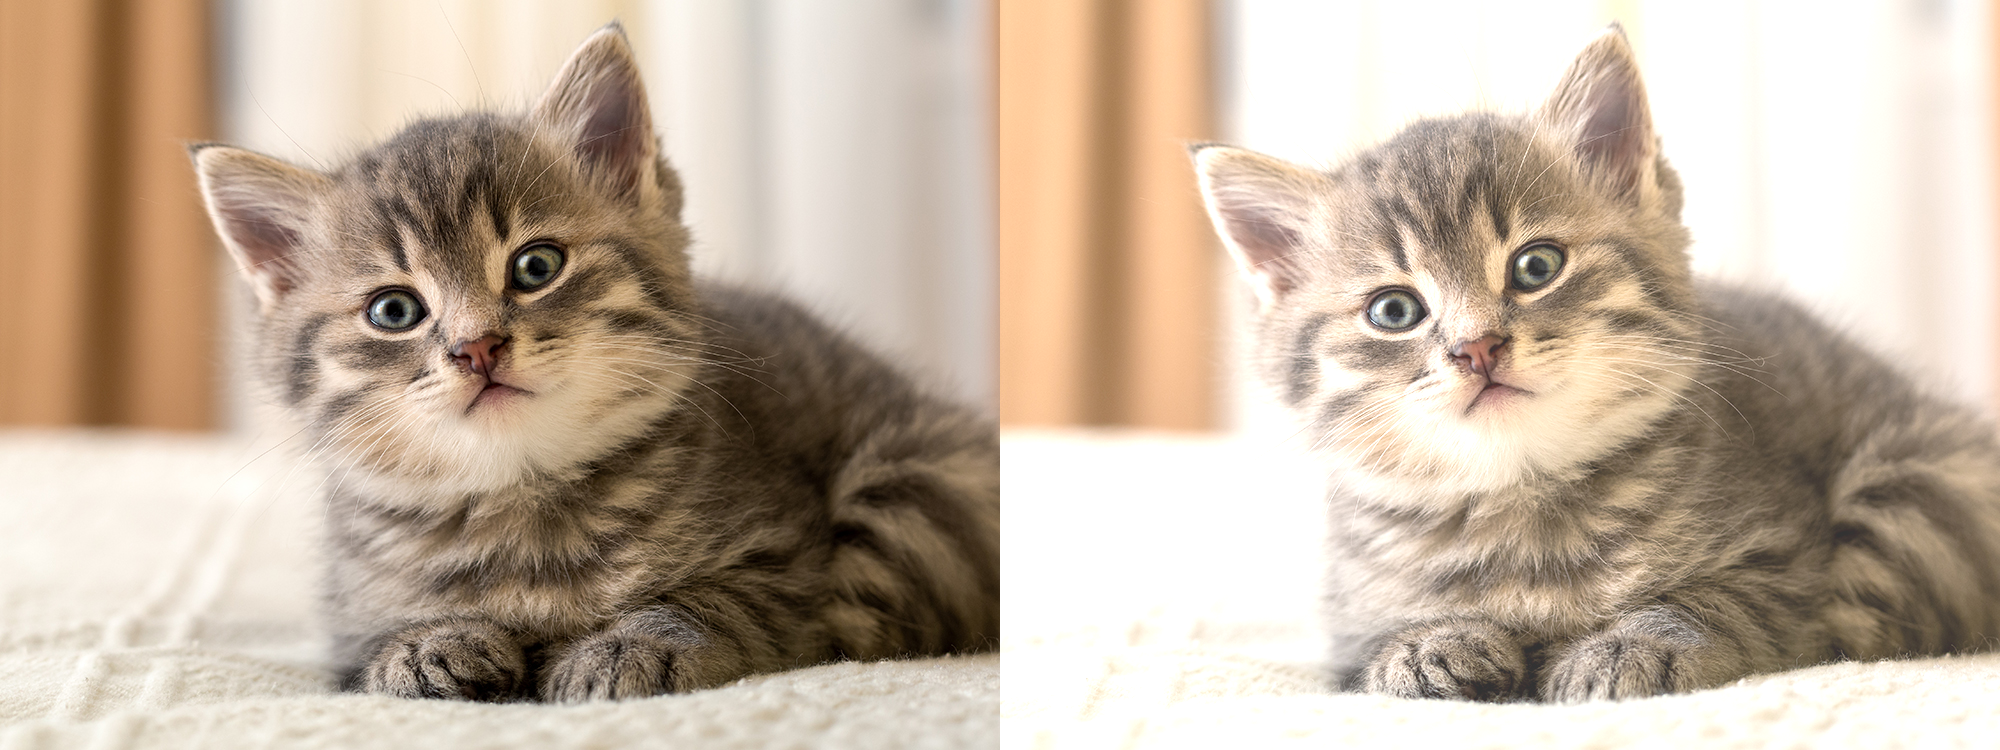

In [8]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah tingkat kecerahan citra ')
print('-----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/2021_0825_Kitten_Health.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Pilih operasi citra:
1. Ubah Brightness
2. Invers (Negative Image)
3. Brightness + Contrast
4. Ubah Brightness (Transformasi Log)
5. Grayscale Transformation
6. Ubah Brightness (Transformasi Log)
Masukkan pilihan (1/2/3/4/5/6): 6


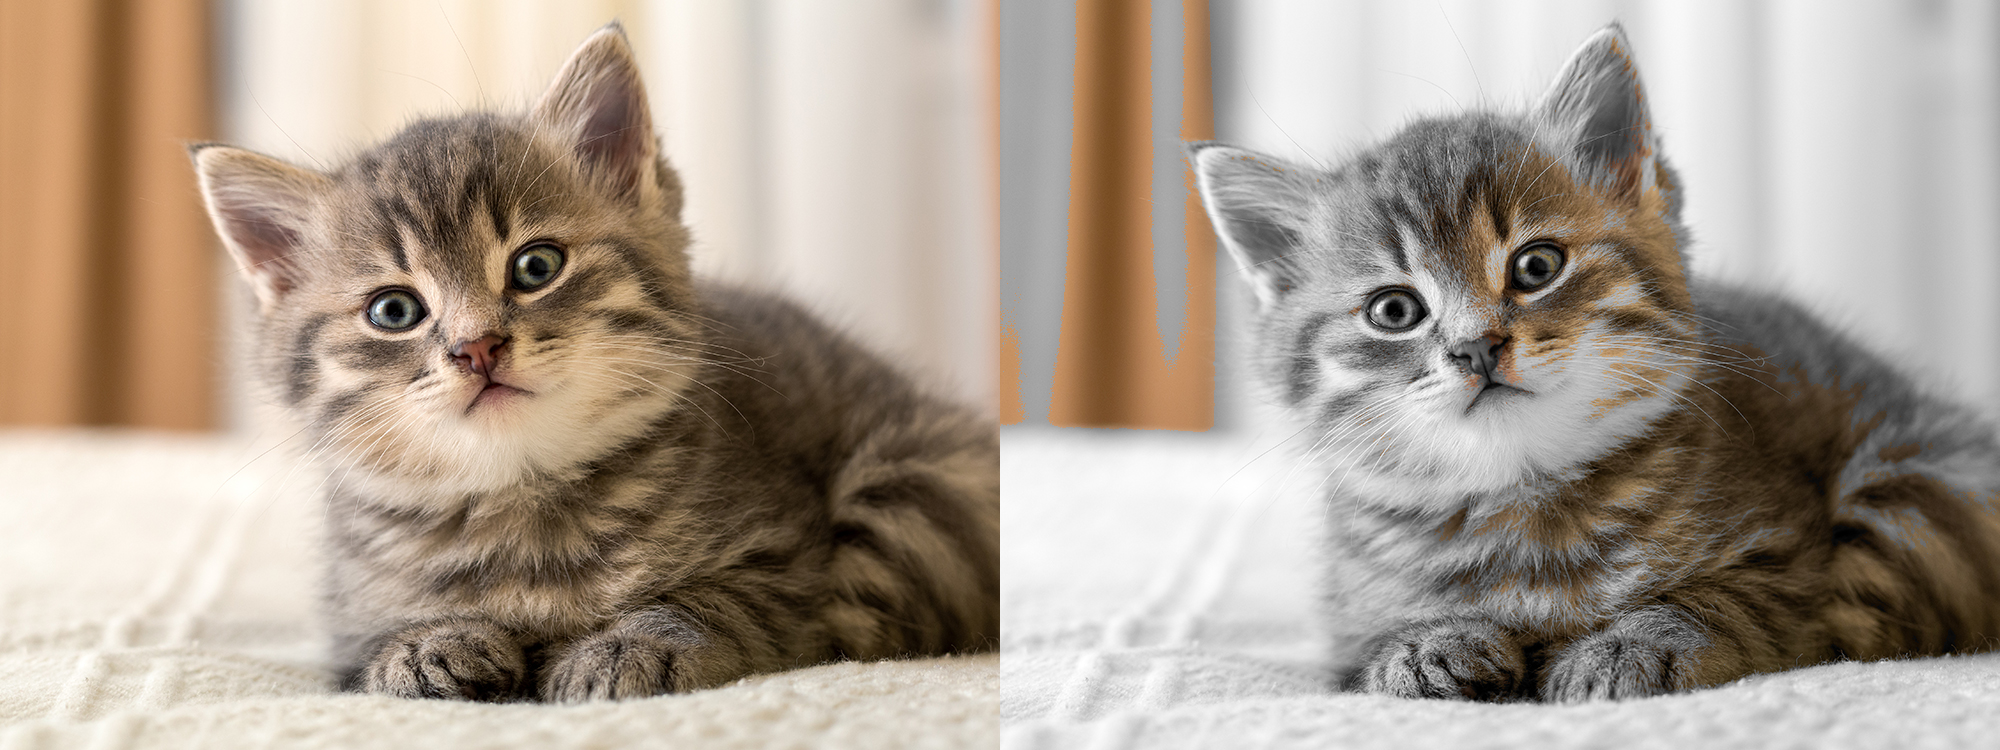

In [23]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Pilih operasi citra:')
print('1. Ubah Brightness')
print('2. Invers (Negative Image)')
print('3. Brightness + Contrast')
print('4. Ubah Brightness (Transformasi Log)')
print('5. Grayscale Transformation')
print('6. Ubah Brightness (Transformasi Log)')

try:
    choice = int(input('Masukkan pilihan (1/2/3/4/5/6): '))
except ValueError:
    print('Error, input harus angka!')
    choice = 0

original = cv.imread('/content/drive/MyDrive/PCVK/Images/2021_0825_Kitten_Health.jpg')

if choice == 1:
    brightness = int(input('Masukkan nilai kecerahan: '))
    brightness_image = cv.convertScaleAbs(original, beta=brightness)
    final_frame = cv.hconcat((original, brightness_image))
    cv2_imshow(final_frame)

elif choice == 2:
    inverse_image = 255 - original
    final_frame = cv.hconcat((original, inverse_image))
    cv2_imshow(final_frame)

elif choice == 3:
    beta = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
    alpha = float(input("Masukkan nilai kontras [1.0 - 3.0]: "))
    adjusted = cv.convertScaleAbs(original, alpha=alpha, beta=beta)
    final_frame = cv.hconcat((original, adjusted))
    cv2_imshow(final_frame)

elif choice == 4:
    original_float = original.astype(np.float32)
    c = float(input("Masukkan nilai kecerahan: "))
    log_image = c * (np.log(1 + original_float))
    log_image = np.array(log_image, dtype=np.uint8)
    final_frame = cv.hconcat((original, log_image))
    cv2_imshow(final_frame)

elif choice == 5:
    B, G, R = cv.split(original.astype(np.float32))
    gray_avg = ((R + G + B) / 3).astype(np.uint8)
    gray_light = ((np.maximum(np.maximum(R, G), B) + np.minimum(np.minimum(R, G), B)) / 2).astype(np.uint8)
    gray_lum = (0.299 * R + 0.587 * G + 0.114 * B).astype(np.uint8)
    final_frame = cv.hconcat([
        original,
        cv.cvtColor(gray_avg, cv.COLOR_GRAY2BGR),
        cv.cvtColor(gray_light, cv.COLOR_GRAY2BGR),
        cv.cvtColor(gray_lum, cv.COLOR_GRAY2BGR)
    ])
    cv2_imshow(final_frame)

elif choice == 6:
    gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
    gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)
    hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)
    lower_brown = np.array([10, 100, 20])
    upper_brown = np.array([30, 255, 200])
    mask = cv.inRange(hsv, lower_brown, upper_brown)
    color_part = cv.bitwise_and(original, original, mask=mask)
    mask_inv = cv.bitwise_not(mask)
    gray_part = cv.bitwise_and(gray_bgr, gray_bgr, mask=mask_inv)
    final = cv.add(color_part, gray_part)
    final_frame = cv.hconcat([original, final])
    cv2_imshow(final_frame)

else:
    print("Pilihan tidak valid!")
